<a href="https://colab.research.google.com/github/Divyaa0205/Probation-Projects-24/blob/divya/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataClean.csv")
data = data.drop(columns=['Unnamed: 0'])

In [114]:
df = pd.DataFrame(data)
df

,brand,model,transmission,age,fuel,engine,Distance,owner,price,location,mileage,power,seats,type
0,volkswagen,ameo,manual,8.0,diesel,NaN,52858.0 KM,1.0,876000,uttar pradesh,NaN,NaN,5.0,sedan
1,renault,duster,manual,8.0,diesel,1461.0,54000.0 KM,NaN,315000,NaN,19.64,108.45,5.0,NaN
2,land,rover,automatic,21.0,diesel,1197.0,75000.0 KM,2.0,1611000,mumbai,0.00,74.00,NaN,NaN
3,mercedes-benz,new,automatic,10.0,diesel,2143.0,44965000.0 Meters,1.0,1795000,kochi,19.27,170.00,5.0,NaN
4,maruti,alto,manual,4.0,cng,NaN,27993.0 KM,1.0,445000,maharashtra,NaN,NaN,5.0,hatchback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,hyundai,santro,manual,15.0,petrol,1086.0,136642.0 KM,2.0,155000,chennai,17.92,62.10,5.0,NaN
32196,volkswagen,vento,manual,8.0,petrol,1598.0,44000.0 KM,NaN,550000,NaN,15.04,103.60,5.0,NaN
32197,bmw,5,automatic,8.0,diesel,1995.0,69000.0 KM,NaN,1575000,NaN,18.12,190.00,5.0,NaN
32198,hyundai,new santro,manual,3.0,petrol,NaN,16502.0 KM,1.0,520000,karnataka,NaN,NaN,5.0,hatchback


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   Distance      32200 non-null  object 
 7   owner         16819 non-null  float64
 8   price         32200 non-null  int64  
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 3.4+ MB


In [116]:
df.isnull().sum()

,0
brand,1
model,1
transmission,0
age,1
fuel,0
engine,8132
Distance,0
owner,15381
price,0
location,18399


In [117]:
(df.isnull().sum()/df.shape[0]) * 100

,0
brand,0.003106
model,0.003106
transmission,0.000000
age,0.003106
fuel,0.000000
engine,25.254658
Distance,0.000000
owner,47.767081
price,0.000000
location,57.139752


In [118]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1]) * 100

20.11845607808341

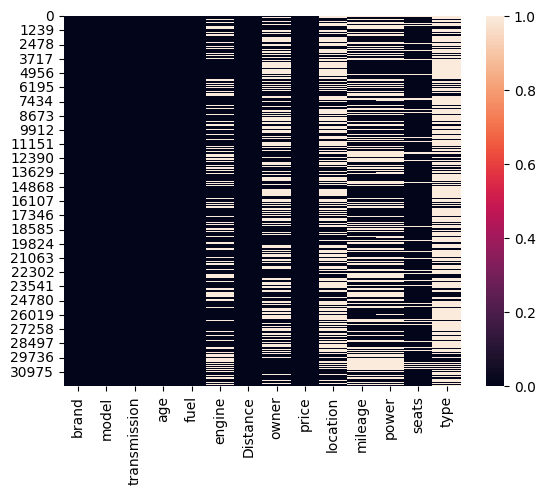

In [119]:
sns.heatmap(df.isnull())
plt.show()

In [120]:
#df.drop(columns = ["location"], inplace = True)
#df

In [121]:
unique_str = (df['Distance'].str.split().str[1]).unique()
unique_str

array(['KM', 'Meters', 'Miles'], dtype=object)

In [122]:
def convert_to_km(row):
    value, unit = row.split()
    value = float(value)
    if unit == 'Meters':
        return value * 0.001
    elif unit == 'Miles':
        return value * 1.60934
    else:
        return value

df['Distance_KM'] = df['Distance'].apply(convert_to_km)
df= df.drop(columns = ['Distance'])
df

,brand,model,transmission,age,fuel,engine,owner,price,location,mileage,power,seats,type,Distance_KM
0,volkswagen,ameo,manual,8.0,diesel,NaN,1.0,876000,uttar pradesh,NaN,NaN,5.0,sedan,52858.0
1,renault,duster,manual,8.0,diesel,1461.0,NaN,315000,NaN,19.64,108.45,5.0,NaN,54000.0
2,land,rover,automatic,21.0,diesel,1197.0,2.0,1611000,mumbai,0.00,74.00,NaN,NaN,75000.0
3,mercedes-benz,new,automatic,10.0,diesel,2143.0,1.0,1795000,kochi,19.27,170.00,5.0,NaN,44965.0
4,maruti,alto,manual,4.0,cng,NaN,1.0,445000,maharashtra,NaN,NaN,5.0,hatchback,27993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,hyundai,santro,manual,15.0,petrol,1086.0,2.0,155000,chennai,17.92,62.10,5.0,NaN,136642.0
32196,volkswagen,vento,manual,8.0,petrol,1598.0,NaN,550000,NaN,15.04,103.60,5.0,NaN,44000.0
32197,bmw,5,automatic,8.0,diesel,1995.0,NaN,1575000,NaN,18.12,190.00,5.0,NaN,69000.0
32198,hyundai,new santro,manual,3.0,petrol,NaN,1.0,520000,karnataka,NaN,NaN,5.0,hatchback,16502.0


In [123]:
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}\n")
    #print(f"Unique values in {col}: {len(values)}\n")
#model_counts = df['model'].value_counts()
#model_counts

Unique values in brand: ['volkswagen' 'renault' 'land' 'mercedes-benz' 'maruti' 'hyundai' 'audi'
 'honda' 'kia' 'tata' 'nissan' 'datsun' 'jaguar' 'ford' 'mahindra' 'bmw'
 'mini' 'jeep' 'skoda' 'toyota' 'land rover' 'mitsubishi' 'fiat' 'porsche'
 'mg' 'volvo' 'isuzu' 'chevrolet' nan 'lexus' 'bentley' 'force'
 'ambassador' 'smart' 'maserati' 'mercedes-amg']

Unique values in model: ['ameo' 'duster' 'rover' 'new' 'alto' 'i20' 'a4' 'swift' 'city' 'alto k10'
 'kwid' 'polo' 'verna' 'seltos' 'grand' 'tiago' 'kicks' 'a' 'swift dzire'
 'ertiga' 'wagon r' 'wagon' 'ciaz' 'redi go' 'baleno' 'micra' 'altroz'
 'e-class' 'xf' 'ecosport' 'eeco' 'scorpio' 'santa' 'amaze' '5' 'xuv700'
 'xuv500' 'cooper' 'jazz' 'alto 800' 'compass' 'dzire zxi' 'superb'
 'venue' 'vento' 'grand i10' 'wr-v' 'rapid' 'zest' 'creta' 'wagon r 1.0'
 'dzire' 'cr-v' 'go' 'redigo' 'elite i20' 's presso' 'innova' 'm-class'
 'nano' 'bolero' '3' 'c-class' 'i10' 'eon' 'endeavour' 'gl-class'
 'fortuner' 'kuv100' 'cls' 'safari' 'new wago

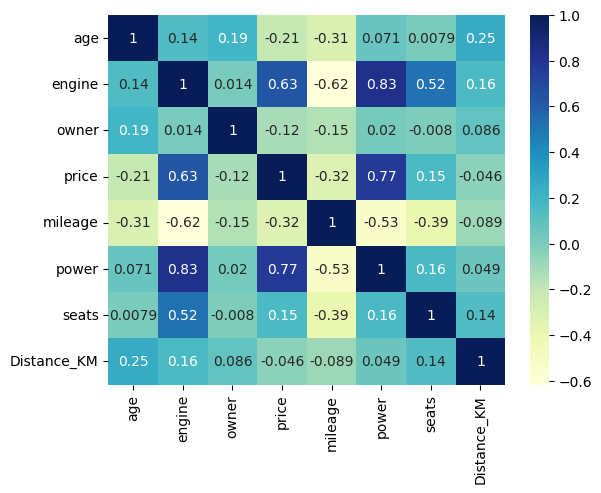

In [124]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [125]:
columns_to_check = df.columns[:14]
df_cleaned = df[df[columns_to_check].isna().sum(axis=1) < 7]
df_cleaned

,brand,model,transmission,age,fuel,engine,owner,price,location,mileage,power,seats,type,Distance_KM
0,volkswagen,ameo,manual,8.0,diesel,NaN,1.0,876000,uttar pradesh,NaN,NaN,5.0,sedan,52858.0
1,renault,duster,manual,8.0,diesel,1461.0,NaN,315000,NaN,19.64,108.45,5.0,NaN,54000.0
2,land,rover,automatic,21.0,diesel,1197.0,2.0,1611000,mumbai,0.00,74.00,NaN,NaN,75000.0
3,mercedes-benz,new,automatic,10.0,diesel,2143.0,1.0,1795000,kochi,19.27,170.00,5.0,NaN,44965.0
4,maruti,alto,manual,4.0,cng,NaN,1.0,445000,maharashtra,NaN,NaN,5.0,hatchback,27993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,hyundai,santro,manual,15.0,petrol,1086.0,2.0,155000,chennai,17.92,62.10,5.0,NaN,136642.0
32196,volkswagen,vento,manual,8.0,petrol,1598.0,NaN,550000,NaN,15.04,103.60,5.0,NaN,44000.0
32197,bmw,5,automatic,8.0,diesel,1995.0,NaN,1575000,NaN,18.12,190.00,5.0,NaN,69000.0
32198,hyundai,new santro,manual,3.0,petrol,NaN,1.0,520000,karnataka,NaN,NaN,5.0,hatchback,16502.0


In [126]:
df = df[~df['model'].isin(['new', 'a', 'e', 'b'])]
df

,brand,model,transmission,age,fuel,engine,owner,price,location,mileage,power,seats,type,Distance_KM
0,volkswagen,ameo,manual,8.0,diesel,NaN,1.0,876000,uttar pradesh,NaN,NaN,5.0,sedan,52858.0
1,renault,duster,manual,8.0,diesel,1461.0,NaN,315000,NaN,19.64,108.45,5.0,NaN,54000.0
2,land,rover,automatic,21.0,diesel,1197.0,2.0,1611000,mumbai,0.00,74.00,NaN,NaN,75000.0
4,maruti,alto,manual,4.0,cng,NaN,1.0,445000,maharashtra,NaN,NaN,5.0,hatchback,27993.0
5,hyundai,i20,manual,4.0,petrol,1197.0,NaN,585000,NaN,17.00,80.00,5.0,NaN,41280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,hyundai,santro,manual,15.0,petrol,1086.0,2.0,155000,chennai,17.92,62.10,5.0,NaN,136642.0
32196,volkswagen,vento,manual,8.0,petrol,1598.0,NaN,550000,NaN,15.04,103.60,5.0,NaN,44000.0
32197,bmw,5,automatic,8.0,diesel,1995.0,NaN,1575000,NaN,18.12,190.00,5.0,NaN,69000.0
32198,hyundai,new santro,manual,3.0,petrol,NaN,1.0,520000,karnataka,NaN,NaN,5.0,hatchback,16502.0


In [127]:
df['transmission'].unique()

array(['manual', 'automatic', 'stick shift', 'gear shift', 'lever shift',
       'StIcKsHiFt', 'automated', 'auto', 'non gear', 'non-clutch'],
      dtype=object)

In [128]:
df.loc[:, 'transmission'] = df['transmission'].str.lower()
df.loc[:, 'transmission'] = df['transmission'].replace({
    'automated': 'automatic',
    'stick shift': 'manual',
    'gear shift': 'manual',
    'lever shift': 'manual',
    'non gear': 'cv',
    'non-clutch': 'automatic',
    'auto': 'automatic'
})
df['transmission'].unique()

array(['manual', 'automatic', 'stickshift', 'cv'], dtype=object)

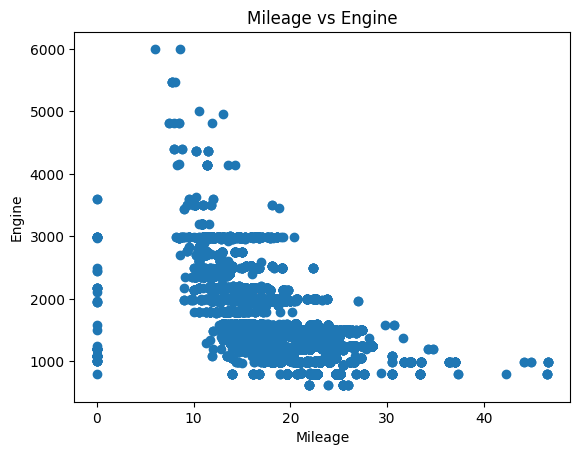

In [129]:
plt.scatter(df['mileage'],df['engine'])
plt.xlabel('Mileage')
plt.ylabel('Engine')
plt.title('Mileage vs Engine')
plt.show()

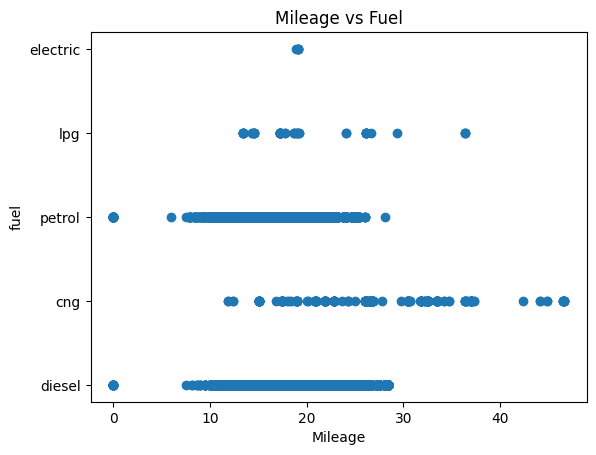

In [130]:
plt.scatter(df['mileage'],df['fuel'])
plt.xlabel('Mileage')
plt.ylabel('fuel')
plt.title('Mileage vs Fuel')
plt.show()

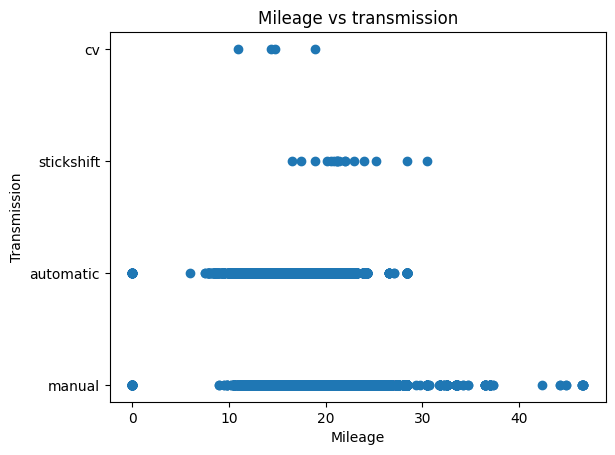

In [131]:
plt.scatter(df['mileage'],df['transmission'])
plt.xlabel('Mileage')
plt.ylabel('Transmission')
plt.title('Mileage vs transmission')
plt.show()

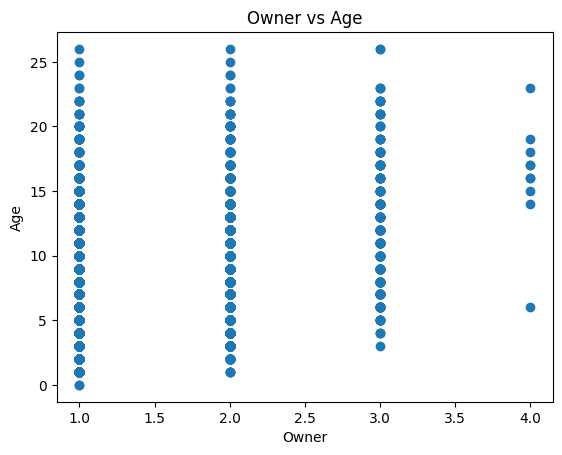

In [132]:
plt.scatter(df['owner'],df['age'])
plt.xlabel('Owner')
plt.ylabel('Age')
plt.title('Owner vs Age')
plt.show()

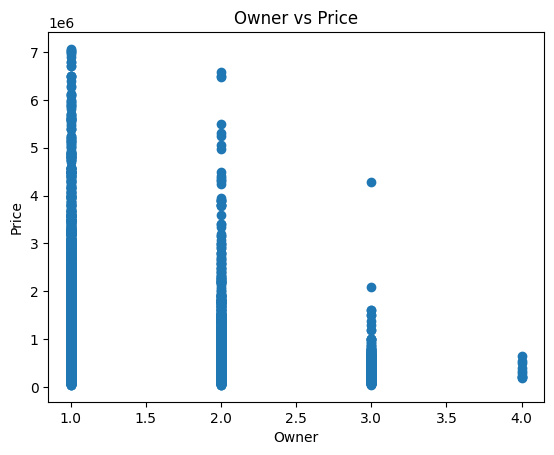

In [133]:
plt.scatter(df['owner'],df['price'])
plt.xlabel('Owner')
plt.ylabel('Price')
plt.title('Owner vs Price')
plt.show()

In [134]:
# Filling missing 'owner' based on conditions
df.loc[(df['price'] < 7000000) & (df['age'] > 0) & (df['age'] < 25.5), 'owner'] = 1
df.loc[(df['price'] < 5500000) & (df['age'] > 1) & (df['age'] < 25.5), 'owner'] = 2
df.loc[(df['price'] < 1800000) & (df['age'] > 2.5) & (df['age'] < 23.5), 'owner'] = 3
df.loc[(df['price'] < 700000) & (df['age'] > 14.5) & (df['age'] < 19.5), 'owner'] = 4
df.head(30)


,brand,model,transmission,age,fuel,engine,owner,price,location,mileage,power,seats,type,Distance_KM
0,volkswagen,ameo,manual,8.0,diesel,NaN,3.0,876000,uttar pradesh,NaN,NaN,5.0,sedan,52858.0
1,renault,duster,manual,8.0,diesel,1461.0,3.0,315000,NaN,19.64,108.45,5.0,NaN,54000.0
2,land,rover,automatic,21.0,diesel,1197.0,3.0,1611000,mumbai,0.00,74.00,NaN,NaN,75000.0
4,maruti,alto,manual,4.0,cng,NaN,3.0,445000,maharashtra,NaN,NaN,5.0,hatchback,27993.0
5,hyundai,i20,manual,4.0,petrol,1197.0,3.0,585000,NaN,17.00,80.00,5.0,NaN,41280.0
6,audi,a4,automatic,11.0,petrol,1984.0,3.0,845000,NaN,10.80,132.00,5.0,NaN,67000.0
7,maruti,swift,manual,9.0,petrol,1197.0,3.0,299000,NaN,18.60,85.80,5.0,NaN,52000.0
8,honda,city,manual,11.0,diesel,NaN,3.0,336000,gujarat,NaN,NaN,5.0,sedan,57786.0
9,maruti,alto k10,manual,13.0,petrol,NaN,3.0,188000,delhi,NaN,NaN,5.0,hatchback,23584.0
10,honda,city,manual,5.0,petrol,1497.0,3.0,651000,NaN,17.40,117.30,5.0,NaN,78236.0


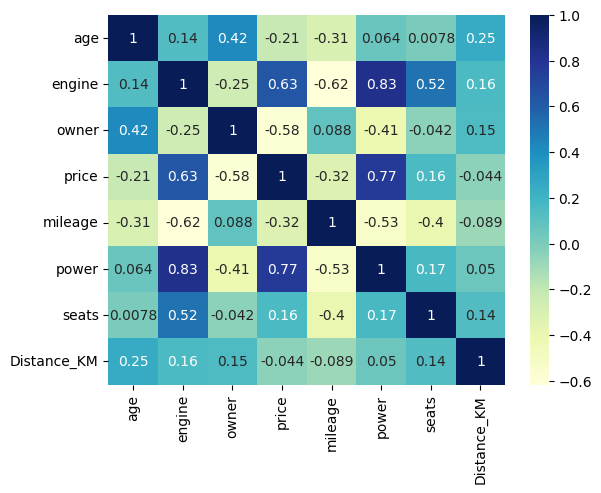

In [135]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

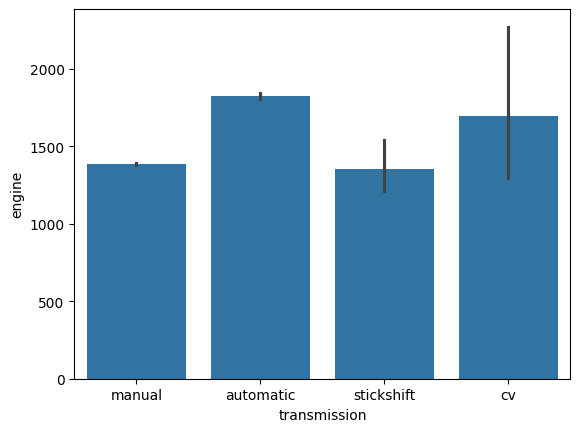

In [136]:
sns.barplot(x = 'transmission', y = 'engine', data = df)
plt.show()

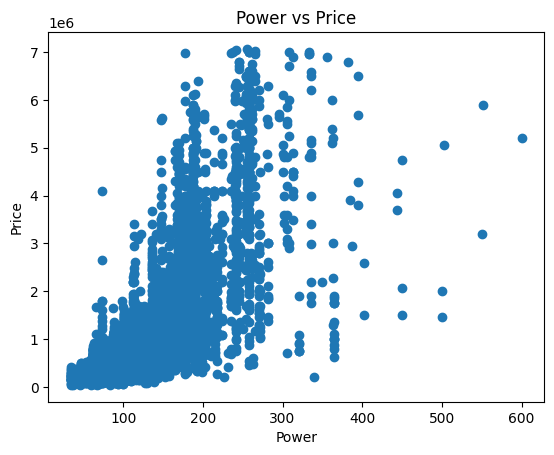

In [137]:
plt.scatter(df['power'],df['price'])
plt.xlabel('Power')
plt.ylabel('Price')
plt.title('Power vs Price')
plt.show()

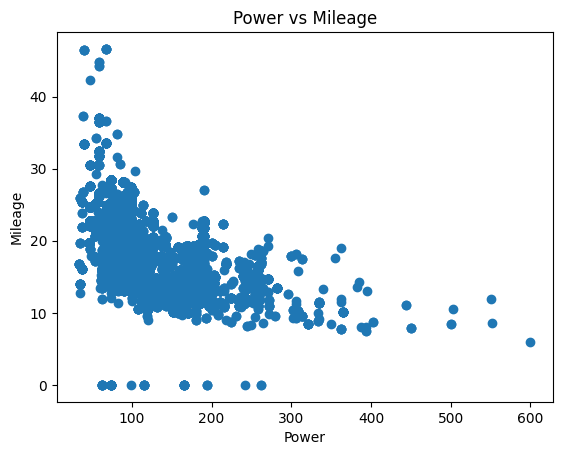

In [138]:
plt.scatter(df['power'],df['mileage'])
plt.xlabel('Power')
plt.ylabel('Mileage')
plt.title('Power vs Mileage')
plt.show()